# Mouse retina development

In [1]:
import shutup
shutup.please()

import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-07-03 11:21:04


2024-07-03 19:21:04.505571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 19:21:04.527182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 19:21:04.527236: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "retina"
data_path = "/lustre/project/Stat/s1155202250ShareData/datamuyang/Retina/retina_processed.h5ad"
adata = sc.read(data_path)

group_key = "Annotation"
emb_key = "X_umap"
cluster_edges = [('Progenitor', 'Neuroblast'), ('Neuroblast', 'PR'), ('Neuroblast', 'AC/HC'), ('Neuroblast', 'RGC')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

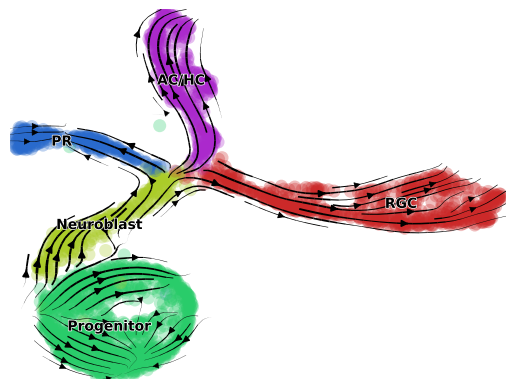

TIVelo:
 CBDir: 0.3928 ICVCoh: 0.7263 
 CBDir2: 0.5421 ICVCoh2: 0.8080 
 TransProbs: 0.4679 VeloCoh: 0.0852


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

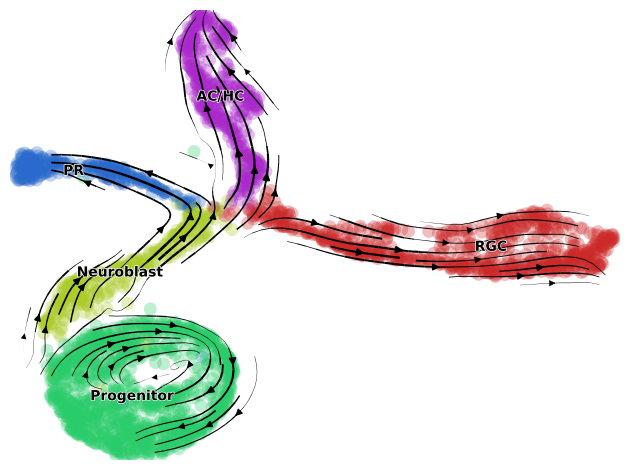

scvelo:
 CBDir: 0.5080 ICVCoh: 0.9106 
 CBDir2: 0.0286 ICVCoh2: 0.8230 
 TransProbs: 0.1290 VeloCoh: -0.0015


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

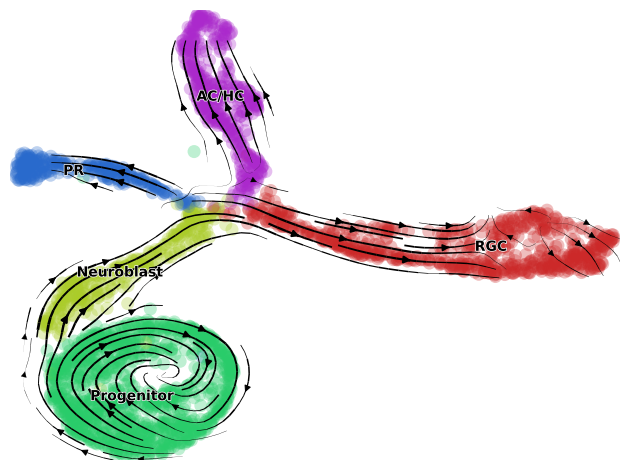

scvelo2:
 CBDir: 0.4698 ICVCoh: 0.8589 
 CBDir2: 0.2717 ICVCoh2: 0.7502 
 TransProbs: 0.2925 VeloCoh: 0.2086


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

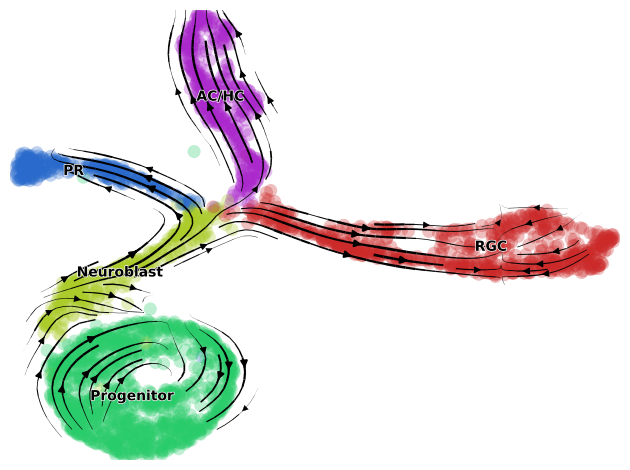

velovi:
 CBDir: 0.5825 ICVCoh: 0.8655 
 CBDir2: 0.1389 ICVCoh2: 0.7670 
 TransProbs: 0.1539 VeloCoh: 0.1871


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

In [8]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

------> Manully Specified Parameters <------
MAX_ITER:	10000
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /lustre/project/Stat/s1155202250/fastfolder/code/muyang/tivelo/docs/source/notebooks/notebooks.
Results will be stored in res folder
Filtered out 166 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
Extracted 1834 highly variable genes.
Computing moments for 1834 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)

# of velocity genes 765 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity ge

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

## Run cellDancer

computing velocity graph (using 20/20 cores)


  0%|          | 0/2726 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


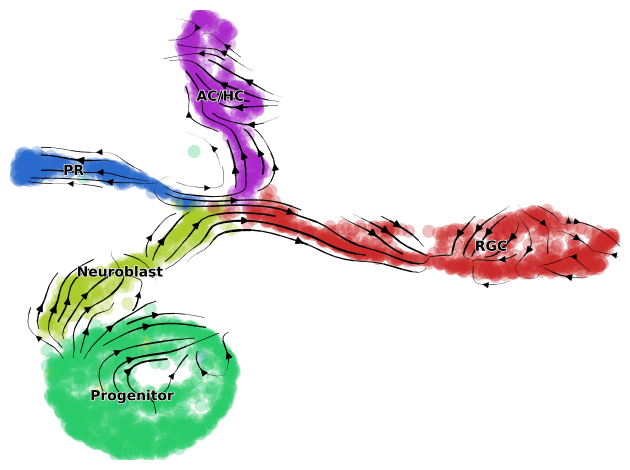

celldancer:
 CBDir: 0.4415 ICVCoh: 0.9091 
 CBDir2: 0.2402 ICVCoh2: 0.4782 
 TransProbs: 0.0311 VeloCoh: -0.2708


In [ ]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)